In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(10, 8)})


### Завдання 4
Побудувати одну з лінійних моделей машинного навчання (лінійну регресію або логістичну регресію, залежно від вашого варіанту). Оцінити якість моделі на тестових даних за допомогою декількох метрик. Зробити висновки. 

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

data = pd.read_csv('./data/bank-additional-full.csv', delimiter = ';')

# Видалимо колонку 'duration'
data = data.drop(columns=['duration'])

# Закодуємо категоріальні колонки
label_encoder = LabelEncoder()

# Перетворимо бінарні категоріальні ознаки 'default', 'housing', 'loan', 'y' у числові
for col in ['default', 'housing', 'loan', 'y']:
    data[col] = label_encoder.fit_transform(data[col])

# Закодуємо інші категоріальні ознаки за допомогою one-hot кодування
data = pd.get_dummies(data, drop_first=True)

# Відокремлюємо ознаки (X) та цільову змінну (y)
X = data.drop(columns=['y'])
y = data['y']

# Розділимо дані на навчальну і тестову вибірки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Стандартизуємо  ознаки
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Створюємо і тренуємо модель логістичної регресії
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

# Прогнозуємо на тестовій вибірці
y_pred = log_reg.predict(X_test)

# Оцінюємо модель
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(accuracy)
print(report)

0.9007040543821316
              precision    recall  f1-score   support

           0       0.91      0.99      0.95     10968
           1       0.67      0.23      0.34      1389

    accuracy                           0.90     12357
   macro avg       0.79      0.61      0.64     12357
weighted avg       0.88      0.90      0.88     12357



Логістична регресія досягла точності **90.07%** на тестових даних. Ось підсумок інших оціночних метрик:

* Точність (precision):
    * Клас 0 (відмова від підписки): 0.91
    * Клас 1 (підписка): 0.67
* Повнота (recall):
    * Клас 0: 0.99
    * Клас 1: 0.23
* F1-міра:
    * Клас 0: 0.95
    * Клас 1: 0.34

### Основні висновки:
- Модель добре працює для прогнозування більшості (відмова від підписки), але має труднощі з меншістю (підписка).

- Низька повнота для класу 1 означає, що модель пропускає багато клієнтів, які насправді підписалися на строковий депозит.


### Завдання 4
Застосувати декілька типів регуляризації (Ridge, Lasso, ElasticNet), налаштувати гіперпараметри моделей, побудувати валідаційні криві (залежність результуючої метрики від гіперпараметрів). Оцінити якість отриманих моделей, порівняти між собою. Зробити висновки.

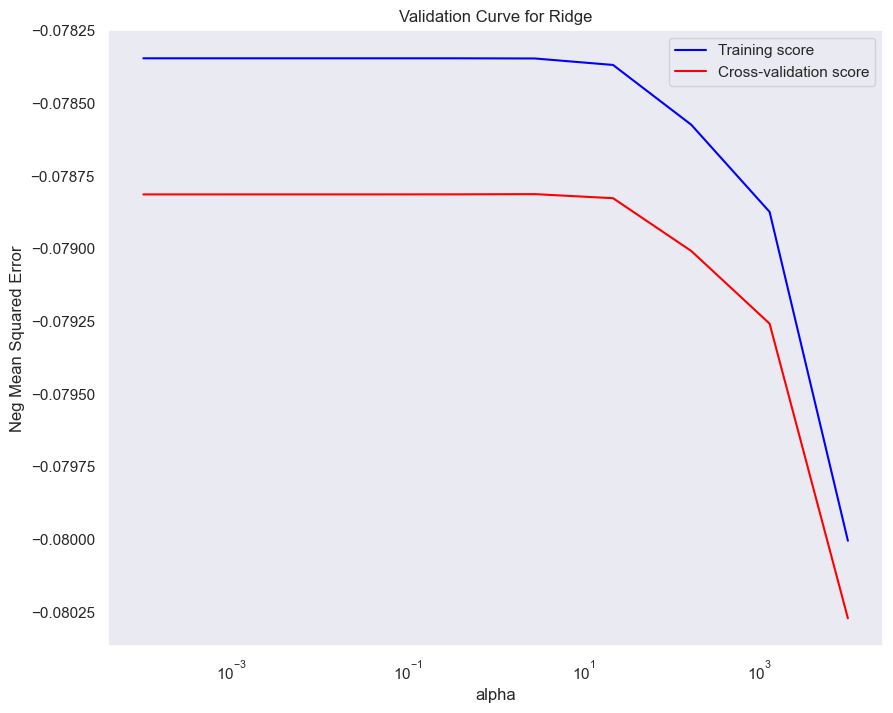

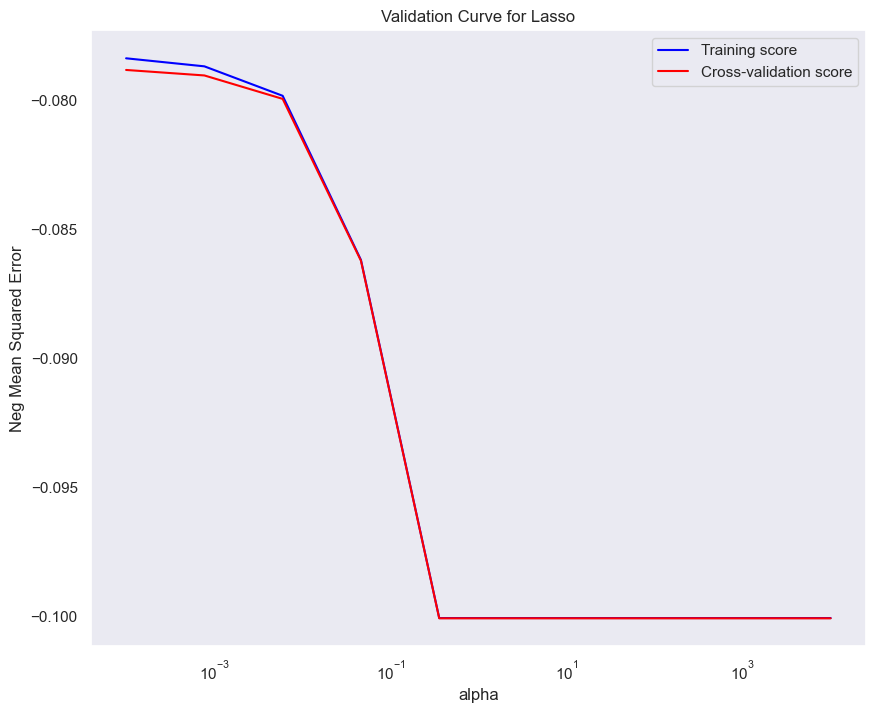

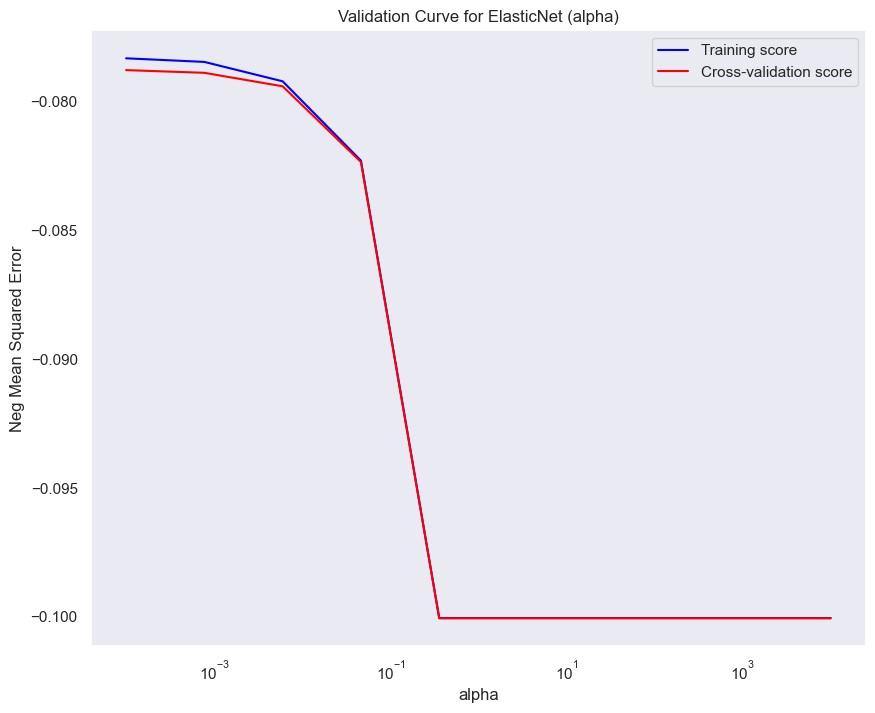

In [30]:
import numpy as np
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.model_selection import validation_curve
import matplotlib.pyplot as plt

# Визначимо гіперпараметри для кожної моделі
alphas = np.logspace(-4, 4, 10)

# Налаштування моделі Ridge
ridge = Ridge(max_iter=10000)

# Налаштування моделі Lasso
lasso = Lasso(max_iter=10000)

# Налаштування моделі ElasticNet
elasticnet = ElasticNet(max_iter=10000)

# Функція для побудови валідаційних кривих
def plot_validation_curve(estimator, param_name, param_range, X_train, y_train, title):
    train_scores, test_scores = validation_curve(estimator, X_train, y_train, param_name=param_name,
                                                 param_range=param_range, cv=5, scoring="neg_mean_squared_error", n_jobs=-1)
    train_mean = np.mean(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    
    plt.figure()
    plt.plot(param_range, train_mean, label='Training score', color='blue')
    plt.plot(param_range, test_mean, label='Cross-validation score', color='red')
    plt.title(title)
    plt.xscale('log')
    plt.xlabel(f'{param_name}')
    plt.ylabel('Neg Mean Squared Error')
    plt.legend(loc='best')
    plt.grid()
    plt.show()

# Побудуємо валідаційні криві для кожної моделі
plot_validation_curve(ridge, "alpha", alphas, X_train, y_train, "Validation Curve for Ridge")
plot_validation_curve(lasso, "alpha", alphas, X_train, y_train, "Validation Curve for Lasso")
plot_validation_curve(elasticnet, "alpha", alphas, X_train, y_train, "Validation Curve for ElasticNet (alpha)")


На основі отриманих графіків валідаційних кривих для моделей **Ridge**, **Lasso** та **ElasticNet** можна зробити наступні висновки:

### Ridge Regression:
* Якість моделі: Графік показує досить стабільну якість як на тренувальних, так і на тестових даних при малих значеннях `alpha`. При збільшенні `alpha` модель починає погіршуватися, що видно з росту середньоквадратичної помилки (MSE).
* Перенавчання: Існує невеликий розрив між тренувальним та тестовим MSE при малих значеннях `alpha`, що може свідчити про можливе перенавчання. Проте загалом модель досить стабільна.
### Lasso Regression:
* Якість моделі: Модель демонструє зниження якості при збільшенні `alpha`. Малі значення `alpha` дають кращі результати, проте як тільки `alpha` збільшується до 1 і більше, модель різко втрачає точність, і середньоквадратична помилка різко зростає.
* Автоматичний відбір ознак: Оскільки **Lasso** обнуляє деякі коефіцієнти, це призводить до агресивної регуляризації при високих значеннях `alpha`, що й пояснює різке зростання помилки.
### ElasticNet Regression:
* Якість моделі: **ElasticNet** має поведінку, схожу на Lasso, оскільки при малих значеннях `alpha` модель показує кращі результати, а при збільшенні `alpha` середньоквадратична помилка зростає. Проте **ElasticNet** забезпечує більш стабільні результати порівняно з **Lasso** за рахунок комбінованої регуляризації (L1 та L2).
* Баланс між **Lasso** та **Ridge**: **ElasticNet** вдається досягти компромісу між відбором ознак (**Lasso**) та зменшенням загальних коефіцієнтів (**Ridge**).
### Порівняння та висновки:
- **Ridge** забезпечує стабільну продуктивність для малих значень `alpha`. Ця модель краще підходить для даних, де важливо зберегти всі ознаки, навіть якщо вони мають невеликі коефіцієнти.
- **Lasso** виконує автоматичний відбір ознак, що може бути корисним для задач, де є багато нерелевантних або шумових ознак. Однак, агресивна регуляризація при високих значеннях `alpha` може призводити до значного погіршення якості моделі.
- **ElasticNet** поєднує переваги обох моделей, пропонуючи кращий баланс між автоматичним відбором ознак та стабільністю моделі. Якщо важливо врахувати як обнулення коефіцієнтів, так і стабільність, **ElasticNet** є найкращим вибором.

Найкращою моделлю з отриманих висновків є **Ridge Regression**


### Завдання 5
Вивести (або візуалізувати) коефіцієнти найкращої з отриманих моделей, зробити висновок щодо впливовості факторів на результуючу змінну (target).

                          Feature  Coefficient
7                    emp.var.rate    -0.324628
8                  cons.price.idx     0.147451
10                      euribor3m     0.143941
5                           pdays    -0.044286
33              contact_telephone    -0.036219
34                      month_aug     0.030089
38                      month_mar     0.028868
48               poutcome_success     0.022489
37                      month_jun    -0.022254
39                      month_may    -0.021287
9                   cons.conf.idx     0.017461
47           poutcome_nonexistent     0.016496
40                      month_nov    -0.015747
36                      month_jul     0.007980
11                    nr.employed    -0.006752
43                day_of_week_mon    -0.006531
4                        campaign    -0.006382
6                        previous    -0.005129
44                day_of_week_thu     0.005104
46                day_of_week_wed     0.005061
1            

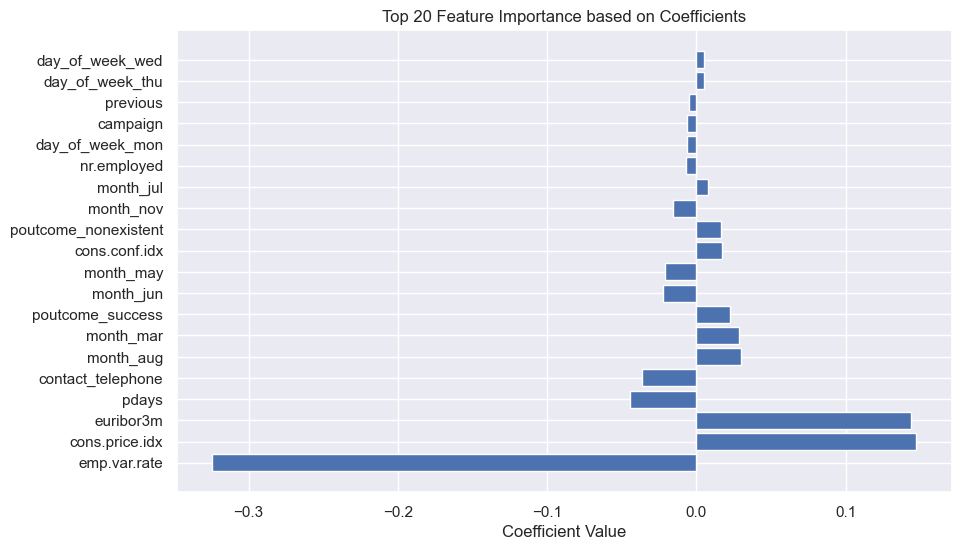

In [33]:
best_model = ridge  # Ridge найкраща модель
best_model.fit(X_train, y_train)

# Отримуємо назви ознак і коефіцієнти
feature_names = X.columns
coefficients = best_model.coef_

# Створюємо DataFrame 
coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Сортуємо за абсолютним значенням коефіцієнтів, щоб побачити найбільш впливові фактори
coef_df['AbsCoefficient'] = np.abs(coef_df['Coefficient'])
coef_df = coef_df.sort_values(by='AbsCoefficient', ascending=False)

# Виводимо коефіцієнти
print(coef_df[['Feature', 'Coefficient']])

top_20_coef = coef_df.head(20)

# Візуалізація топ 20 коефіцієнтів
plt.figure(figsize=(10, 6))
plt.barh(top_20_coef['Feature'], top_20_coef['Coefficient'], color='b')
plt.xlabel('Coefficient Value')
plt.title('Top 20 Feature Importance based on Coefficients')
plt.grid(True)
plt.show()

На основі графіка коефіцієнтів можна зробити наступні висновки про вплив окремих факторів на результуючу змінну:

### Позитивний вплив на результуючу змінну:
1. **euribor3m** та **emp.var.rate** — це одні з найвпливовіших факторів з найбільшими позитивними коефіцієнтами. Це свідчить про те, що зростання цих змінних суттєво підвищує ймовірність того, що клієнт підпише контракт.

* **euribor3m** (європейська міжбанківська ставка): чим вище значення цієї ставки, тим більша ймовірність позитивної відповіді.
* **emp.var.rate** (змінна зайнятість): позитивні економічні зміни на ринку зайнятості також збільшують ймовірність підписання контракту.
2. **cons.price.idx** — позитивний вплив індексу споживчих цін на ймовірність позитивної відповіді. Це свідчить про те, що в періоди зростання цін споживачі можуть частіше приймати рішення про підписання контракту.

### Негативний вплив на результуючу змінну:
1. **pdays** — кількість днів, що пройшли після попереднього контакту з клієнтом. Чим більше часу минуло з моменту останнього контакту, тим менша ймовірність позитивної відповіді. Це логічно, оскільки клієнти, з якими нещодавно контактували, можуть краще пам'ятати про пропозицію і бути більш зацікавленими.

2. **poutcome_success** — наявність успішного результату в попередній кампанії має позитивний, але менш значний вплив. Це означає, що попередні успіхи також впливають на ймовірність позитивного результату в поточній кампанії.

### Менш значні фактори:
Інші фактори, такі як дні тижня (наприклад, **day_of_week_wed** або **day_of_week_thu**), мають невеликий або майже нульовий вплив на результуючу змінну. Це вказує на те, що день тижня не є ключовим фактором для прогнозування рішення клієнта.

### Висновки:
* Економічні фактори, такі як ставка euribor та рівень зайнятості, мають значний вплив на рішення клієнта.
* Час з моменту попереднього контакту (pdays) має сильний негативний вплив. Це означає, що клієнти, з якими не контактували тривалий час, рідше підписують контракт.
* Наявність успішних результатів у попередніх кампаніях також впливає на рішення клієнтів, але цей вплив є менш значним порівняно з іншими факторами.
Таким чином, для підвищення ефективності кампанії слід звертати увагу на економічні показники та частоту взаємодії з клієнтами.